In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
from pathlib import Path
sys.path.append("..")

from scripts.data_utils.loaders import load_data
from scripts.data_utils.utils import summarize_data
from scripts.data_utils.cleaning import BrentOilDataPreprocessor
from scripts.data_utils.eda import BrentOilEDA
from scripts.data_utils.stationarity import *


In [3]:
DATAPATH = Path('..', 'resources', 'data')
filepath = Path(DATAPATH, 'raw', 'BrentOilPrices.csv')
df = load_data(filepath)
summarize_data(df)

2025-02-20 12:44:26 - [✅ INFO] - Loading data from ..\resources\data\raw\BrentOilPrices.csv
2025-02-20 12:44:26 - [✅ INFO] - Successfully loaded data from ..\resources\data\raw\BrentOilPrices.csv
2025-02-20 12:44:26 - [✅ INFO] - 
--- Data Summary ---
2025-02-20 12:44:27 - [✅ INFO] -         count  unique        top freq       mean       std  min    25%    50%  \
Date     9011    9011  20-May-87    1        NaN       NaN  NaN    NaN    NaN   
Price  9011.0    5015        NaN  NaN  48.420782  32.86011  9.1  19.05  38.57   

         75%     max    dtype  
Date     NaN     NaN   object  
Price  70.09  143.95  float64  
2025-02-20 12:44:27 - [✅ INFO] - 
--- Data Info ---
2025-02-20 12:44:27 - [✅ INFO] - <class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9011 non-null   object 
 1   Price   9011 non-null   float64
dtypes: float64(1), object(1)
memory 

In [4]:
preprocessor = BrentOilDataPreprocessor(filepath)
# processed_data = preprocessor.preprocess()
# processed_data

In [5]:
preprocessor.load_data()
preprocessor.get_data()

2025-02-20 12:44:27 - [✅ INFO] - Data loaded successfully. Shape: (9011, 2)


,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63
...,...,...
9006,"Nov 08, 2022",96.85
9007,"Nov 09, 2022",93.05
9008,"Nov 10, 2022",94.25
9009,"Nov 11, 2022",96.37


In [6]:
preprocessor.parse_dates()
preprocessor.get_data()

c:\Users\Darkles\10academy\10Academy-Kifiya-Week-10\notebooks\..\scripts\data_utils\cleaning.py:46: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.data["Date"] = pd.to_datetime(self.data["Date"], errors='coerce', dayfirst=True) # , format='%d/%m/%Y')


2025-02-20 12:44:29 - [✅ INFO] - Date parsing completed.


,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
9006,2022-11-08,96.85
9007,2022-11-09,93.05
9008,2022-11-10,94.25
9009,2022-11-11,96.37


In [7]:
preprocessor.clean_data()
preprocessor.get_data()

2025-02-20 12:44:30 - [✅ INFO] - Data cleaning completed.


,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
9006,2022-11-08,96.85
9007,2022-11-09,93.05
9008,2022-11-10,94.25
9009,2022-11-11,96.37


In [8]:
preprocessor.handle_missing_values()
preprocessor.get_data()

2025-02-20 12:44:31 - [✅ INFO] - Handled missing values.


c:\Users\Darkles\10academy\10Academy-Kifiya-Week-10\notebooks\..\scripts\data_utils\cleaning.py:62: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  self.data["Price"] = self.data["Price"].fillna(method='ffill')
c:\Users\Darkles\10academy\10Academy-Kifiya-Week-10\notebooks\..\scripts\data_utils\cleaning.py:63: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  self.data["Price"] = self.data["Price"].fillna(method='bfill')


,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
9006,2022-11-08,96.85
9007,2022-11-09,93.05
9008,2022-11-10,94.25
9009,2022-11-11,96.37


In [9]:
preprocessor.remove_outliers()
preprocessor.get_data()

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
9006,2022-11-08,96.85
9007,2022-11-09,93.05
9008,2022-11-10,94.25
9009,2022-11-11,96.37


In [10]:
preprocessor.generate_temporal_features()
preprocessor.get_data()

2025-02-20 12:44:32 - [✅ INFO] - Time-based features added.


,Date,Price,Year,Month,Day,Weekday,Quarter,Is_Weekend,Year_Month
0,1987-05-20,18.63,1987,5,20,2,2,0,1987-05
1,1987-05-21,18.45,1987,5,21,3,2,0,1987-05
2,1987-05-22,18.55,1987,5,22,4,2,0,1987-05
3,1987-05-25,18.60,1987,5,25,0,2,0,1987-05
4,1987-05-26,18.63,1987,5,26,1,2,0,1987-05
...,...,...,...,...,...,...,...,...,...
9006,2022-11-08,96.85,2022,11,8,1,4,0,2022-11
9007,2022-11-09,93.05,2022,11,9,2,4,0,2022-11
9008,2022-11-10,94.25,2022,11,10,3,4,0,2022-11
9009,2022-11-11,96.37,2022,11,11,4,4,0,2022-11


In [11]:
preprocessor.feature_engineering()
preprocessor.get_data()

,Date,Price,Year,Month,Day,Weekday,Quarter,Is_Weekend,Year_Month,7_day_MA,30_day_MA,Rolling_STD,Volatility
364,1988-10-20,13.50,1988,10,20,3,4,0,1988-10,13.071429,12.714667,2.076466,0.031350
365,1988-10-21,13.48,1988,10,21,4,4,0,1988-10,13.218571,12.722333,2.080327,0.031341
366,1988-10-24,12.20,1988,10,24,0,4,0,1988-10,13.168571,12.705667,2.090877,0.035133
367,1988-10-25,12.08,1988,10,25,1,4,0,1988-10,13.008571,12.661667,2.101681,0.033537
368,1988-10-26,12.08,1988,10,26,2,4,0,1988-10,12.798571,12.601000,2.112149,0.032675
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9006,2022-11-08,96.85,2022,11,8,1,4,0,2022-11,96.575714,93.685333,16.857916,0.019875
9007,2022-11-09,93.05,2022,11,9,2,4,0,2022-11,96.540000,93.802000,16.819423,0.020100
9008,2022-11-10,94.25,2022,11,10,3,4,0,2022-11,96.415714,93.963333,16.782916,0.020198
9009,2022-11-11,96.37,2022,11,11,4,4,0,2022-11,96.458571,94.212333,16.745589,0.020483


In [12]:
preprocessed_path = "../resources/data/processed/processed.csv"
preprocessor.save_data(preprocessed_path)

In [13]:
plot_dir = "../screenshots/plots"
eda = BrentOilEDA(preprocessed_path, plot_dir)
# eda.run_eda()
eda.load_data()

2025-02-20 12:44:33 - [✅ INFO] - Data loaded successfully. Shape: (8647, 13)


In [14]:
eda.summarize_data()

2025-02-20 12:44:33 - [✅ INFO] - 
Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8647 entries, 0 to 8646
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         8647 non-null   datetime64[ns]
 1   Price        8647 non-null   float64       
 2   Year         8647 non-null   int64         
 3   Month        8647 non-null   int64         
 4   Day          8647 non-null   int64         
 5   Weekday      8647 non-null   int64         
 6   Quarter      8647 non-null   int64         
 7   Is_Weekend   8647 non-null   int64         
 8   Year_Month   8647 non-null   object        
 9   7_day_MA     8647 non-null   float64       
 10  30_day_MA    8647 non-null   float64       
 11  Rolling_STD  8647 non-null   float64       
 12  Volatility   8647 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(6), object(1)
memory usage: 878.3+ KB
2025-02-20 12:44:33 - [✅

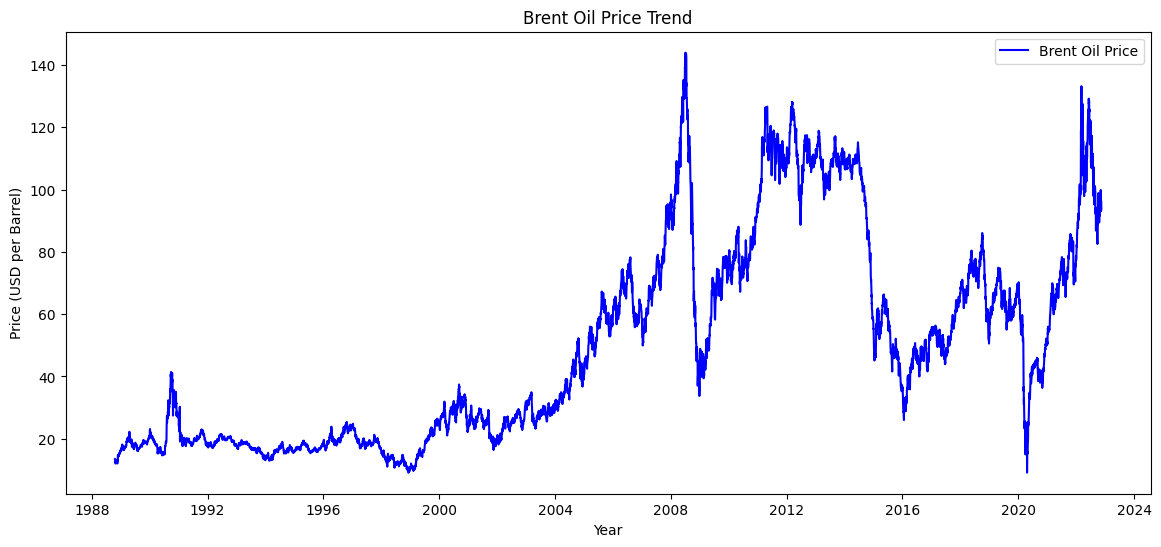

In [15]:
eda.plot_trend()

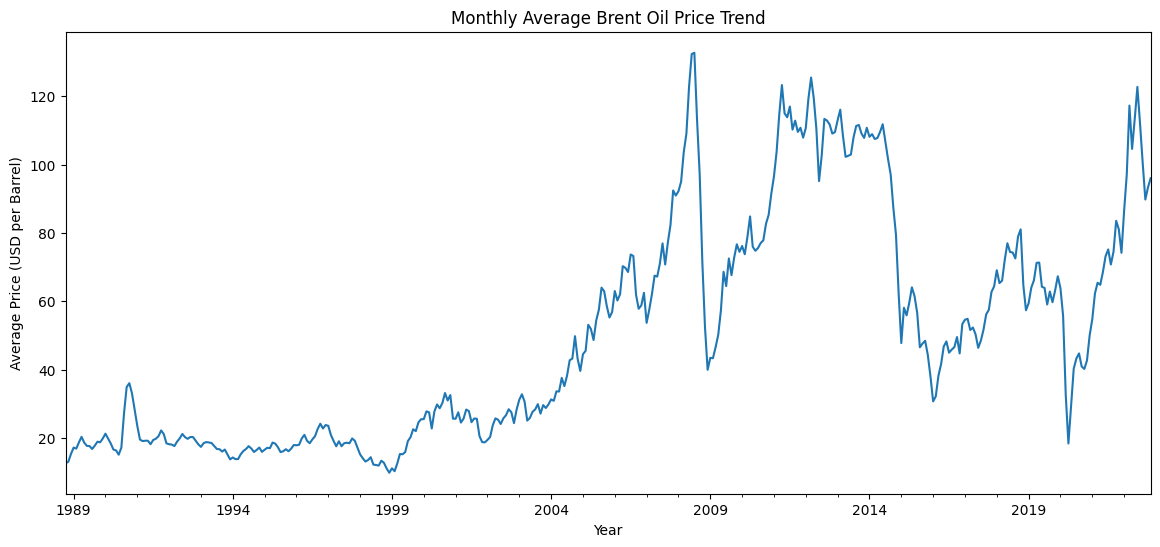

In [16]:
eda.plot_seasonality()

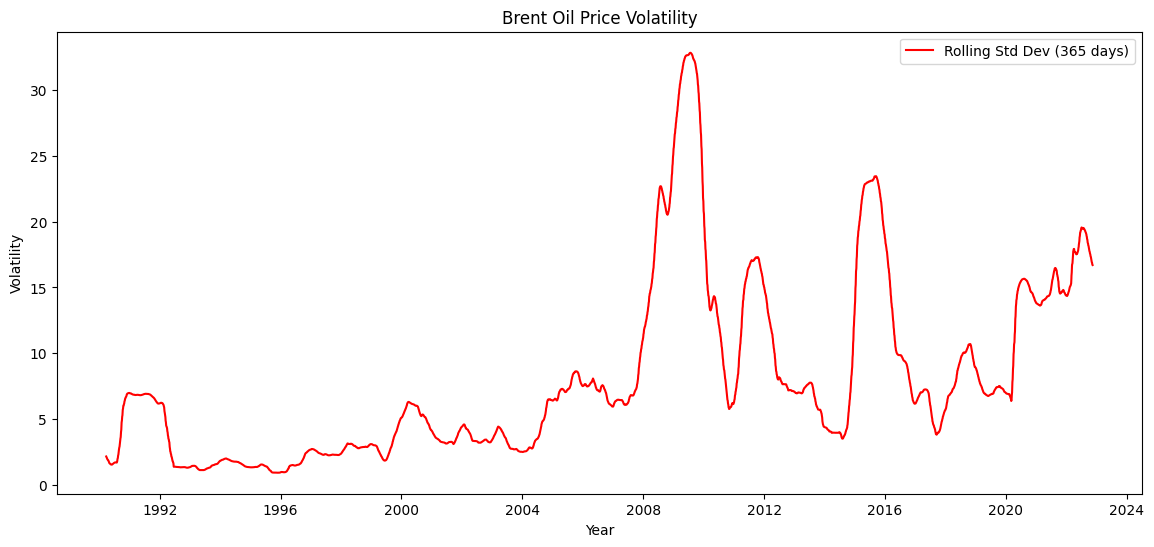

In [17]:
eda.plot_volatility()

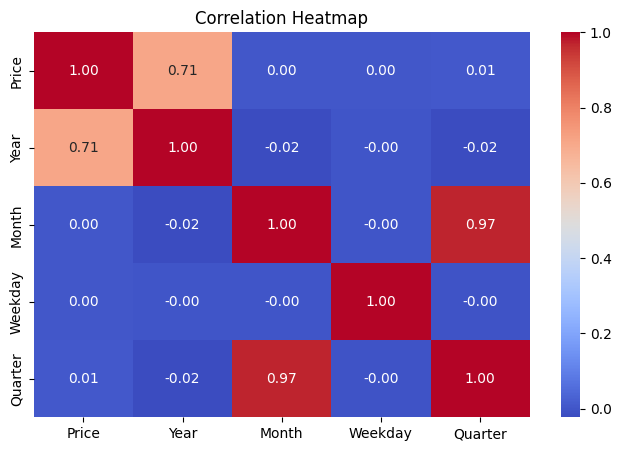

In [18]:
eda.plot_correlation()

The Augmented Dickey-Fuller (ADF) test results indicate that the Brent oil price time series is non-stationary (p-value = 0.2903, which is greater than 0.05).

Next Steps: Making the Time Series Stationary
Since non-stationary data violates the assumptions of many time series models (e.g., ARIMA), we need to transform it to achieve stationarity. Below are the key approaches:

1. Differencing (First Order)
This is the most common method—subtracting the previous value from the current value.
If the p-value drops below 0.05, the series is now stationary.

2. Log Transformation (If Variance is Non-Stationary)
If the time series has heteroscedasticity (increasing variance over time), applying a log transformation can help stabilize it.

3. Seasonal Differencing
If regular differencing doesn’t work, apply seasonal differencing (price[t] - price[t - seasonality]).
For monthly data: seasonality = 12, for daily data: seasonality = 365.

In [57]:
# Test for Stationarity
df = eda.data.copy()
df

,Date,Price,Year,Month,Day,Weekday,Quarter,Is_Weekend,Year_Month,7_day_MA,30_day_MA,Rolling_STD,Volatility
0,1988-10-20,13.50,1988,10,20,3,4,0,1988-10,13.071429,12.714667,NaN,0.031350
1,1988-10-21,13.48,1988,10,21,4,4,0,1988-10,13.218571,12.722333,NaN,0.031341
2,1988-10-24,12.20,1988,10,24,0,4,0,1988-10,13.168571,12.705667,NaN,0.035133
3,1988-10-25,12.08,1988,10,25,1,4,0,1988-10,13.008571,12.661667,NaN,0.033537
4,1988-10-26,12.08,1988,10,26,2,4,0,1988-10,12.798571,12.601000,NaN,0.032675
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8642,2022-11-08,96.85,2022,11,8,1,4,0,2022-11,96.575714,93.685333,16.857916,0.019875
8643,2022-11-09,93.05,2022,11,9,2,4,0,2022-11,96.540000,93.802000,16.819423,0.020100
8644,2022-11-10,94.25,2022,11,10,3,4,0,2022-11,96.415714,93.963333,16.782916,0.020198
8645,2022-11-11,96.37,2022,11,11,4,4,0,2022-11,96.458571,94.212333,16.745589,0.020483


In [54]:
test_results = test_stationarity(df, 'Price')
test_results

2025-02-20 13:05:06 - [✅ INFO] - 
Augmented Dickey-Fuller Test Results:


{'ADF Statistic': -2.047127697639108,
 'p-value': 0.26629891048187443,
 'Stationary': False}

In [59]:
df, test_results = stationary_pipeline(df)
df

2025-02-20 13:09:44 - [✅ INFO] - 
Augmented Dickey-Fuller Test Results:
2025-02-20 13:09:46 - [✅ INFO] - 
Augmented Dickey-Fuller Test Results:


,Date,Price,Year,Month,Day,Weekday,Quarter,Is_Weekend,Year_Month,7_day_MA,30_day_MA,Rolling_STD,Volatility,Price_diff_1,log_Price,Log_Price
0,1988-10-20,13.50,1988,10,20,3,4,0,1988-10,13.071429,12.714667,NaN,0.031350,NaN,2.602690,2.602690
1,1988-10-21,13.48,1988,10,21,4,4,0,1988-10,13.218571,12.722333,NaN,0.031341,-0.02,2.601207,2.601207
2,1988-10-24,12.20,1988,10,24,0,4,0,1988-10,13.168571,12.705667,NaN,0.035133,-1.28,2.501436,2.501436
3,1988-10-25,12.08,1988,10,25,1,4,0,1988-10,13.008571,12.661667,NaN,0.033537,-0.12,2.491551,2.491551
4,1988-10-26,12.08,1988,10,26,2,4,0,1988-10,12.798571,12.601000,NaN,0.032675,0.00,2.491551,2.491551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8642,2022-11-08,96.85,2022,11,8,1,4,0,2022-11,96.575714,93.685333,16.857916,0.019875,-3.02,4.573163,4.573163
8643,2022-11-09,93.05,2022,11,9,2,4,0,2022-11,96.540000,93.802000,16.819423,0.020100,-3.80,4.533137,4.533137
8644,2022-11-10,94.25,2022,11,10,3,4,0,2022-11,96.415714,93.963333,16.782916,0.020198,1.20,4.545951,4.545951
8645,2022-11-11,96.37,2022,11,11,4,4,0,2022-11,96.458571,94.212333,16.745589,0.020483,2.12,4.568195,4.568195


In [56]:
test_results

{'ADF Statistic': -15.201098626086912,
 'p-value': 5.828120480585245e-28,
 'Stationary': True}